# Natural Language Processing (part 2)

- Capture context
- Word frequency
- Lemmatization

Download <a href="https://drive.google.com/file/d/1Agjn0OXmm8KDgPllVjm6ZzbGLjhvwdbG/view?usp=share_link">transcripts from a January 6th Hearing.</a>


In [1]:
## import libraries
import spacy
import pandas as pd
import glob


In [2]:
## run this list
fruits = ["apple", "banana", "cherry", "fig"]
fruits

['apple', 'banana', 'cherry', 'fig']

In [3]:
# Without enumerate

print("Without enumerate:")
for fruit in fruits:
    print(fruit)


Without enumerate:
apple
banana
cherry
fig


In [4]:
# With enumerate
for i, fruit in enumerate(fruits):
    print(f"Index position {i}: {fruit}")

Index position 0: apple
Index position 1: banana
Index position 2: cherry
Index position 3: fig


## Capture Context

In the January 6th Hearing transcripts, I want to capture any sentence that has the word "Trump".

In [5]:
## pull in transcript
my_file = "jan6-transcript.txt"
my_file

'jan6-transcript.txt'

In [6]:
## read it into text
## preprocess to lowercase

with open(my_file,"r") as f:
    all_text = f.read().lower()

In [7]:
## Trump in sentence; it's splitting the text at the fullstop and storing it in sentence once if it has trumo in it
[ sentence for sentence in all_text.split(".") if "trump" in sentence]

['\n\nfor the weeks between the november election and january 6th, donald trump was a force to be reckoned with',
 ' and more tellingly, donald trump ignored and disregarded the desperate pleas of his own family, including ivanka and don junior',
 " we also remind you of what was happening at the capitol minute by minute, as the final violent, tragic part of donald trump's scheme to cling to power unraveled while he ignored his advisers, stood by, and watched it unfold on television",
 ' there can be no doubt that there was a coordinated, multistep effort to overturn an election overseen and directed by donald trump',
 ' these facts have gone undisputed, and so there needs to be accountability, accountability under the law, accountability to the american people, accountability at every level, from the local precincts in many states where donald trump and his allies attacked election workers for just doing their jobs, all the way up to the oval office, where donald trump embraced the le

In [8]:
trump_list = []
for sentence in all_text.split("."):
    if ("trump") in sentence:
        trump_list.append(sentence)

trump_list

['\n\nfor the weeks between the november election and january 6th, donald trump was a force to be reckoned with',
 ' and more tellingly, donald trump ignored and disregarded the desperate pleas of his own family, including ivanka and don junior',
 " we also remind you of what was happening at the capitol minute by minute, as the final violent, tragic part of donald trump's scheme to cling to power unraveled while he ignored his advisers, stood by, and watched it unfold on television",
 ' there can be no doubt that there was a coordinated, multistep effort to overturn an election overseen and directed by donald trump',
 ' these facts have gone undisputed, and so there needs to be accountability, accountability under the law, accountability to the american people, accountability at every level, from the local precincts in many states where donald trump and his allies attacked election workers for just doing their jobs, all the way up to the oval office, where donald trump embraced the le

### Need context

To gather some of the context around the word "trump", we could capture the sentences that come before and after our target. 



### Apply ```enumerate``` to grab context

In [51]:
## list with all sentences
sentences = all_text.split(".") ##store all sentences in a list
# create empty list to store all the results
context_sentences = []
# iterate through it using enumerate
for i, sentence in enumerate(sentences):
    #check if "trump" in current sentence
    if "trump" in sentence:
        prev_sentence = sentences[i-1] if i-0 > 0 else "nothing here"
        next_sentence = sentences[i+1] if i+0 <len(sentences) else "stopped cz its over"
        context_sentences.append((prev_sentence.strip(), 
                                 sentence.strip(), 
                                 next_sentence.strip()))
context_sentences

[('afterward, on january 6th when he knew that the assembled mob was heavily armed and angry, he commanded the mob to go to the capitol, and he emphatically commanded the heavily armed mob to fight like hell',
  'for the weeks between the november election and january 6th, donald trump was a force to be reckoned with',
  'he shrugged off the factuality and legality correct sober advice of his knowledgeable and sensible advisers'),
 ('for 187 minutes on january 6th, this man of unbridled destructive energy could not be moved, not by his aides, not by his allies, not by the violent chants of rioters, or the desperate pleas of those facing down the riot',
  'and more tellingly, donald trump ignored and disregarded the desperate pleas of his own family, including ivanka and don junior',
  'even though he was the only person in the world who could call off the mob he sent to the capitol, he could not be moved to rise from his dining room table and walk the few steps down the white house hal

In [10]:
# Show full content without truncation-like excel sheet
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [55]:
## Create df with columns
df = pd.DataFrame(context_sentences)
df.columns = ["prev_s", "target","next_s"]


In [54]:
## call df
df

,prev_s,target,next_s
0,"afterward, on january 6th when he knew that th...",for the weeks between the november election an...,he shrugged off the factuality and legality co...
1,"for 187 minutes on january 6th, this man of un...","and more tellingly, donald trump ignored and d...",even though he was the only person in the worl...
2,"luria of virginia, will take you inside the wh...",we also remind you of what was happening at th...,let me offer a final thought about the select ...
3,"but as that work goes forward, a number of fac...",there can be no doubt that there was a coordin...,"there can be no doubt that he commanded a mob,..."
4,and he made targets out of his own vice presid...,"these facts have gone undisputed, and so there...",our democracy withstood the attack on january 6th
...,...,...,...
192,we must remember that we cannot abandon the tr...,"in late november of 2020, while president trum...","as january 6th approached, i circulated a memo..."
193,"as january 6th approached, i circulated a memo...",but what i did not know at the time was that p...,there was no evidence of fraud or irregulariti...
194,our courts had ruled it was over,now we know that it didn't matter what any of ...,he was looking for a way to remain in office
195,no nuance,donald trump made a purposeful choice to viola...,there is no way to excuse that behavior


## Multi-word search with context

In [56]:
## pre-process text
all_text = all_text.lower()

In [59]:
## Code here
sentences = all_text.split(".")
target_words = ["mob", "trump", "white house", "capitol", "proud boys"]

context_sentences = []
for target_word in target_words:
    for i, sentence in enumerate(sentences):
        #check for target_word in current sentence
        if target_word in sentence:
            prev_sentence = sentences[i-1] if i-0 > 0 else "nothing here"
            next_sentence = sentences[i+1] if i+0 <len(sentences) else "stopped cz its over"
            context_sentences.append((target_word, prev_sentence.strip(), 
                                 sentence.strip(), 
                                 next_sentence.strip()))


In [60]:
## create df with column
df = pd.DataFrame(context_sentences)
df.columns = ["search_terms", "previous sentence", "target sentence", "next sentence"]
df

,search_terms,previous sentence,target sentence,next sentence
0,mob,he tried to destroy our democratic institutions,he summoned a mob to washington,"afterward, on january 6th when he knew that th..."
1,mob,he summoned a mob to washington,"afterward, on january 6th when he knew that th...",for the weeks between the november election an...
2,mob,"and more tellingly, donald trump ignored and d...",even though he was the only person in the worl...,he could not be moved
3,mob,there can be no doubt that there was a coordin...,"there can be no doubt that he commanded a mob,...",and he made targets out of his own vice presid...
4,mob,"at the time, the republican leader of the unit...",[begin videotape]\n\nmitch mcconnell: a mob wa...,"these criminals were carrying his banners, han..."
...,...,...,...,...
417,capitol,we've described how the president of the unite...,"but it's more than that, donald trump summoned...",and when he was thwarted in his effort to lead...
418,capitol,he is preying on their sense of justice,"and on january 6th, donald trump turned their ...",he has purposely created the false impression ...
419,capitol,we have much work yet to do and we will see yo...,i request those in the hearing room remain sea...,"without objection, the committee stands adjourned"
420,proud boys,"[end videotape]\n\nelaine luria: by this time,...",the joint session of congress to certify joe b...,radio communications from law enforcement info...


In [66]:
capitol = df.query("search_terms == 'capitol'")
type(capitol)

pandas.core.frame.DataFrame

## Word Frequency

In [16]:
## import that language model
import en_core_web_sm

In [17]:
## build nlp pipeline (a function will tokenize, parse and ner for us)
nlp = en_core_web_sm.load()

### Stop Words

- These are common words that add no additional meaning to our analysis.
- Words like ```the```, ```and``` and ```any```.
- Spacy has just over 326 ```stop words``` in its defalt library.
- Read more on <a href="https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47">stop words</a>

In [18]:
## show all default stop words


In [19]:
## check if a word (have, near, be, lol) is a stop word 



In [20]:
## how many  stop words do we have?


In [21]:
## Add your own stop word



In [22]:
## CHECK IF 'lol' is a stop word


In [23]:
## how many do stop words do we have now?


In [24]:
## Remove a stop word from list because it is relevant.
## notice the word "lol" is a stop word.



In [25]:
## CHECK IF 'empty' is a stop word


### Words frequency in our Jan. 6 hearing text

In [26]:
## type all_text


In [27]:
## run all text through nlp pipeline


In [28]:
## show one token at a time


In [29]:
## code here


# Lemmatization

In natural language processing, ```lemmatization``` is the process of reducing words to their base and removing their inflectional endings.



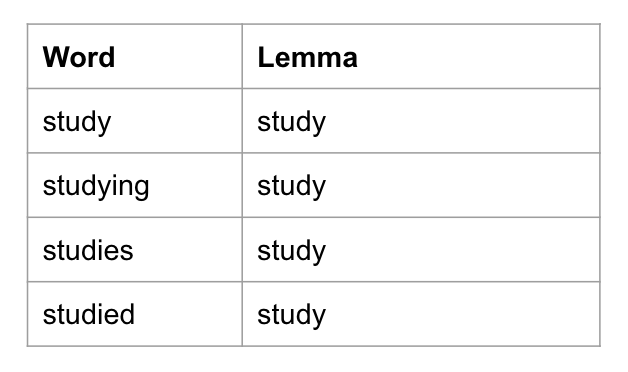

In [30]:
## non-sense sample text with similar words
text = "I delivered the delivery and am always delivering \
my deliveries on time. \
He delivers late. This is my deliverance! \
This is a fragment of some fragments. \
When it was fragmented what happens to \
fragmentation or even fragmentations? \
The economic reality is that global economies \
are in for a rough time and people will find it \
difficult no matter how much they economize. "

In [31]:
## create spacy object by running through NLP pipeline


In [32]:
## lemmatize the words
## note how they have gone down to the root words




In [33]:
## lemma via lc


In [34]:
## call lemma list


In [35]:
## type?


## Remove Stop words

In [36]:
## pull out a word from list


In [37]:
## is it a stopword?


## This will run through the entire lemmatized list but keep only words that are NOT stop words or punctuation and place in a list.

In [38]:
## code here


In [39]:
## Here are the non-stop words in the list



## Let's count their frequency

In [40]:
## use counter to count the frequency of words in the terms list


In [41]:
## type


In [42]:
## pull out the 10 most frequently used words (roots, variations and all)
